In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = r'D:\dataset\final sheet - Copy.csv'
dataset = pd.read_csv(csv_path)

In [3]:
input_data = dataset.drop(columns = ["UCS"])
output_data = dataset['UCS']
from sklearn.preprocessing import minmax_scale
X =  minmax_scale(input_data, feature_range=(0,1))
Y = minmax_scale(output_data, feature_range=(0,1))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
from sklearn.svm import SVR
svr = SVR(kernel="linear", C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train,y_train);

In [7]:
y_pred = svr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df

In [8]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09200258120344192
Mean Squared Error: 0.015882178654665628
Root Mean Squared Error: 0.12602451608582207


In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6143052516492118

In [10]:
importance = svr.coef_
importance

array([[ 0.14261993,  0.2763138 ,  0.2274932 , -0.0655245 , -0.26987668,
        -0.09076979, -0.27894794, -0.06084434, -0.09541798, -4.91880641,
         2.84900107,  5.09683474]])

Feature: 0, Score: 0.00617
Feature: 1, Score: 0.01293
Feature: 2, Score: 0.00230
Feature: 3, Score: 0.01581
Feature: 4, Score: 0.00703
Feature: 5, Score: 0.01712
Feature: 6, Score: 0.01820
Feature: 7, Score: 0.00545
Feature: 8, Score: 0.00550
Feature: 9, Score: 0.38113
Feature: 10, Score: 0.18001
Feature: 11, Score: 0.34837


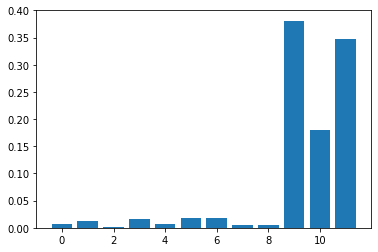

In [11]:
importance = np.array([  3.00558238,   3.72263144,  25.37387579,   7.29693771,185.03184339,  13.95070883,   5.19434573,   3.13860989, 9.69290703,  61.05492875,  60.62433069,  62.81575007])
std = np.array([6.805,11.52,0.3,7.187,0.126,4.07,11.618,5.763,1.881,20.704,9.848,18.394])
importance = importance*std
importance = importance/(importance.sum())
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()